In [550]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from functions import gauss, crystalball, freedman, decay

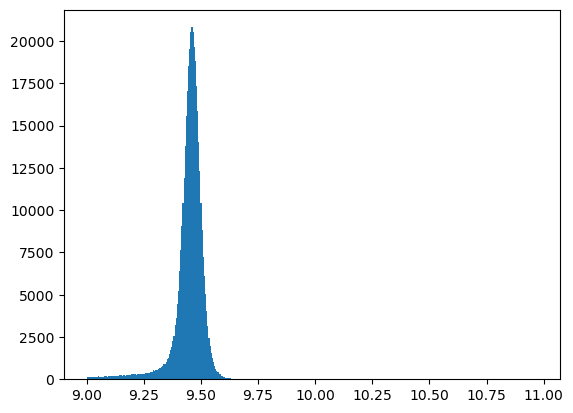

In [551]:
xmass = np.load('mc_anal/xmass_mc.npy')
count_mc, bin, patches = plt.hist(xmass, bins = 400)
bins_m = bin[1:] - (bin[1]-bin[0])/2
bins_mc = bins_m[(bins_m > 9.2) & (bins_m < 9.7)]
count_mc = count_mc[(bins_m > 9.2) & (bins_m < 9.7)]

In [552]:
def lsq(a, mu, sig):
    return np.sum((count_mc-gauss(bins_mc,a,mu,sig)) **2)

In [553]:
m = Minuit(lsq, a = 20000, mu = 9.45, sig = 0.03)


In [554]:
m.migrad()

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/2655901613.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.016e+07                  │              Nfcn = 75               │
│ EDM = 0.000158 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │20.15748e3 │ 0.00035e3 │            │            │         │         │       │
│ 1 │ mu   │ 9.4610225 │ 0.0000007 │            │            │         │         │       │
│ 2 │ sig  │35.8205e-3 │ 0.0007e-3 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────────────────┐
│     │         a        mu       sig │
├─────┼───────────────────────────────┤
│   a │     0.122  5.57e-09 -1.56e-07 │
│  mu │  5.57e-09  4.91e-13 -1.98e-14 │
│ sig │ -1.56e-07 -1.98e-14  5.55e-13 │
└─────┴───────────────────────────────┘

In [555]:
a_fit = m.values['a']
mu_fit = m.values['mu']
sig_fit = m.values['sig']
print(a_fit, mu_fit, sig_fit)

20157.47500014855 9.461022525565358 0.035820508304107594


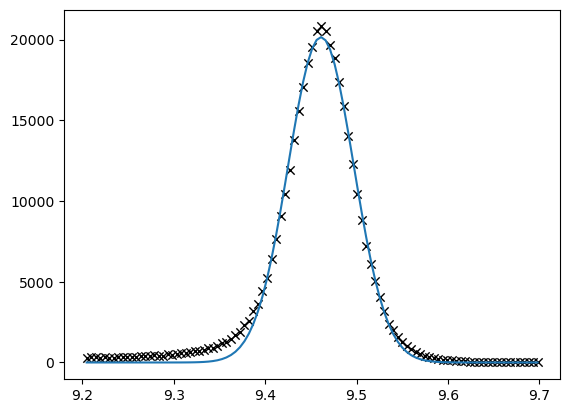

In [556]:
plt.plot(bins_mc, gauss(bins_mc, a_fit, mu_fit, sig_fit))
plt.scatter(bins_mc, count_mc, marker = 'x', lw=1, color = 'k')

In [557]:
def lsq_cb(alpha, n, mu, sig):
    return np.sum((count_mc-crystalball(bins_mc,alpha, n,mu,sig)) **2)


In [558]:
cb_mc = Minuit(lsq_cb, alpha = 1.9, n=0.93371, mu = 9.46, sig = 0.033)

In [559]:
cb_mc.migrad()
cb_mc.hesse()

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/609126106.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb_mc.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.088e+07                  │              Nfcn = 326              │
│ EDM = 0.247 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │1.61413030 │0.00000005 │            │            │         │         │       │
│ 1 │ n     │933.710017e-3│0.000007e-3│            │            │         │         │       │
│ 2 │ mu    │ 9.4615168 │ 0.0000007 │            │            │         │         │       │
│ 3 │ sig   │34.7245e-3 │ 0.0008e-3 │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │  2.39e-15  3.52e-16 -6.49e-16  1.07e-14 │
│     n │  3.52e-16  5.23e-17 -1.13e-16  1.87e-15 │
│    mu │ -6.49e-16 -1.13e-16  4.73e-13 -3.54e-14 │
│   sig │  1.07e-14  1.87e-15 -3.54e-14  5.93e-13 │
└───────┴─────────────────────────────────────────┘

for some reason it is not minimising, EDM is too high

EDM = Estimated distance from Minimum

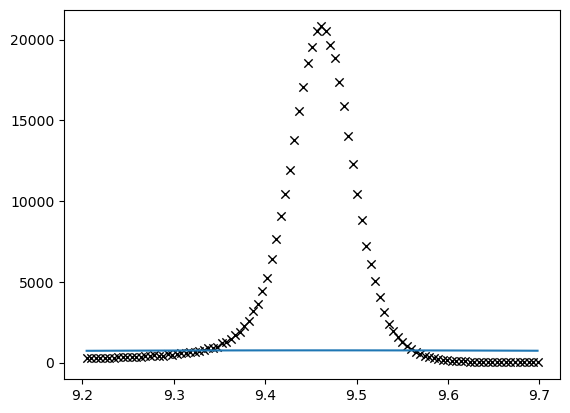

In [560]:
alpha_mc = cb_mc.values['alpha']
n_mc = cb_mc.values['n']
mu_mc = cb_mc.values['mu']
sig_mc = cb_mc.values['sig']

plt.plot(bins_mc, crystalball(bins_mc, alpha_mc, n_mc, mu_mc, n_mc))
plt.scatter(bins_mc, count_mc, marker = 'x', lw=1, color = 'k')
plt.show()

Now try using iminuit and the cb to fit the ups_small data

1384.0


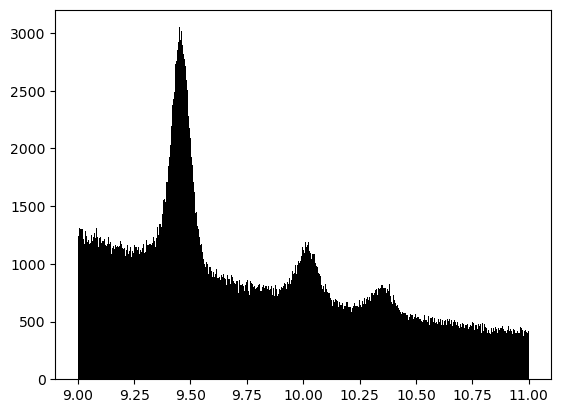

In [561]:
xmass_ups = np.load('ups_anal/xmass.npy')
 
Min = np.min(xmass_ups)
Max = np.max(xmass_ups)
_, n_bins = np.modf((Max-Min)/freedman(xmass))
print(n_bins)

count , bins_w, patches = plt.hist(xmass_ups, color = 'k', bins = int(0.75*n_bins), histtype= 'bar', range =(Min, Max), density=False )
bins = bins_w[1:] - (bins_w[1] - bins_w[0])/2

#histogram of the peaks from raw data
bins_1 = bins[(bins > 9.1) & (bins < 9.7)]
count_1 = count[(bins > 9.1) & (bins < 9.7)]

bins_2 = bins[(bins > 9.8) & (bins < 10.17)]
count_2 = count[(bins > 9.8) & (bins < 10.17)]

bins_3 = bins[(bins > 10.2) & (bins < 10.5)]
count_3 = count[(bins > 10.2) & (bins < 10.5)]

bins_back = np.concatenate((bins[(bins < 9.2) | (bins > 10.55)], bins[(bins > 9.7) & (bins < 9.8)]))
count_back= np.concatenate((count[(bins < 9.2) | (bins > 10.55)], count[(bins > 9.7) & (bins < 9.8)]))

In [562]:
def lsq_back(al,b):
    return np.sum((count_back-decay(bins_back,al,b)) **2)

In [563]:
m_dec = Minuit(lsq_back, al = 100000, b = 0.005)

In [564]:
m_dec.migrad()

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/945649017.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_dec.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.988e+05                  │              Nfcn = 300              │
│ EDM = 2.22e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ al   │ 239.77e3  │  0.23e3   │            │            │         │         │       │
│ 1 │ b    │-582.02e-3 │  0.10e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       al        b │
├────┼───────────────────┤
│ al │ 5.15e+04  -0.0224 │
│  b │  -0.0224 9.79e-09 │
└────┴───────────────────┘

In [565]:
al_fit = m_dec.values['al']
b_fit = m_dec.values['b']

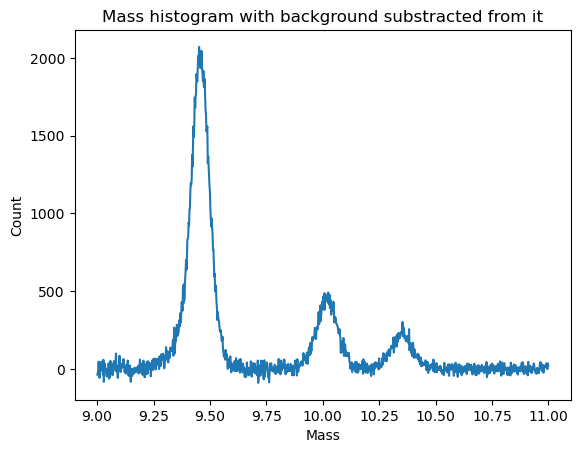

<Figure size 640x480 with 0 Axes>

In [566]:
count_1_clean = count_1 - decay(bins_1, al_fit, b_fit)
count_2_clean = count_2 - decay(bins_2, al_fit, b_fit)
count_3_clean = count_3 - decay(bins_3, al_fit, b_fit)

plt.plot(bins, count - decay(bins, al_fit, b_fit))
plt.title('Mass histogram with background substracted from it')
plt.xlabel('Mass')
plt.ylabel('Count')
plt.show()
plt.clf()

In [567]:
def lsq_cb_1(alpha, n, mu, sig):
    return np.sum((count_1_clean-crystalball(bins_1,alpha, n,mu,sig)) **2)

def lsq_cb_2(alpha, n, mu, sig):
    return np.sum((count_2_clean-crystalball(bins_2,alpha, n,mu,sig)) **2)

def lsq_cb_3(alpha, n, mu, sig):
    return np.sum((count_3_clean-crystalball(bins_3,alpha, n,mu,sig)) **2)

What do i set errordef to,
0.1,
0.5
or 1

In [582]:
cb_1 = Minuit(lsq_cb_1, alpha = 1.5, n = 0.9, mu = 9.45, sig = 0.04)
cb_1.errordef = Minuit.LIKELIHOOD
cb_2 = Minuit(lsq_cb_2, alpha = 1.5, n = 0.9, mu = 10.0, sig = 0.04)
cb_2.errordef = Minuit.LIKELIHOOD
cb_3 = Minuit(lsq_cb_3, alpha = 1.5, n = 0.9, mu = 10.3, sig = 0.04)
cb_3.errordef = Minuit.LIKELIHOOD


for some reason the EDM is also very high, how do i minimise it, can i minimise it to the set goal

In [586]:
cb_1.migrad(iterate = 1000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.825e+05                  │             Nfcn = 2736              │
│ EDM = 737 (Goal: 0.0001)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           ABOVE call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │  1.75854  │  0.00007  │            │            │         │         │       │
│ 1 │ n     │951.868e-3 │ 0.008e-3  │            │            │         │         │       │
│ 2 │ mu    │ 9.4567657 │ 0.0000035 │            │            │         │         │       │
│ 3 │ sig   │ 41.814e-3 │ 0.004e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │  5.08e-09  5.65e-10 -6.36e-12  1.43e-11 │
│     n │  5.65e-10  6.27e-11 -7.09e-13  1.62e-12 │
│    mu │ -6.36e-12 -7.09e-13   1.2e-11 -7.48e-13 │
│   sig │  1.43e-11  1.62e-12 -7.48e-13  1.37e-11 │
└───────┴─────────────────────────────────────────┘

In [587]:
cb_2.migrad(iterate = 1000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.861e+05                  │              Nfcn = 683              │
│ EDM = 978 (Goal: 0.0001)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           ABOVE call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │  1.6735   │  0.0004   │            │            │         │         │       │
│ 1 │ n     │ 940.77e-3 │  0.06e-3  │            │            │         │         │       │
│ 2 │ mu    │ 10.019611 │ 0.000016  │            │            │         │         │       │
│ 3 │ sig   │ 46.315e-3 │ 0.016e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │  1.66e-07  2.25e-08 -9.31e-10  2.19e-09 │
│     n │  2.25e-08  3.04e-09 -1.26e-10  2.99e-10 │
│    mu │ -9.31e-10 -1.26e-10  2.69e-10 -1.25e-11 │
│   sig │  2.19e-09  2.99e-10 -1.25e-11  2.53e-10 │
└───────┴─────────────────────────────────────────┘

In [588]:
cb_3.migrad(iterate = 1000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.078e+04                  │              Nfcn = 688              │
│ EDM = 67.4 (Goal: 0.0001)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           ABOVE call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │  1.7879   │  0.0009   │            │            │         │         │       │
│ 1 │ n     │ 953.48e-3 │  0.10e-3  │            │            │         │         │       │
│ 2 │ mu    │ 10.351205 │ 0.000029  │            │            │         │         │       │
│ 3 │ sig   │ 47.251e-3 │ 0.032e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │  8.39e-07  9.18e-08   5.6e-09 -4.26e-09 │
│     n │  9.18e-08  1.01e-08  6.12e-10 -4.44e-10 │
│    mu │   5.6e-09  6.12e-10  8.65e-10  8.95e-11 │
│   sig │ -4.26e-09 -4.44e-10  8.95e-11  1.04e-09 │
└───────┴─────────────────────────────────────────┘

In [572]:
alpha_fit_1 = cb_1.values['alpha']
n_fit_1 = cb_1.values['n']
mu_fit_1 = cb_1.values['mu']
sig_fit_1 = cb_1.values['sig']

alpha_fit_2 = cb_2.values['alpha']
n_fit_2 = cb_2.values['n']
mu_fit_2 = cb_2.values['mu']
sig_fit_2 = cb_2.values['sig']

alpha_fit_3 = cb_3.values['alpha']
n_fit_3 = cb_3.values['n']
mu_fit_3 = cb_3.values['mu']
sig_fit_3 = cb_3.values['sig']



In [573]:
cb_2_fi = Minuit(lsq_cb_2, alpha = alpha_fit_2, n = n_fit_2, mu = mu_fit_2, sig = sig_fit_1 * (mu_fit_2/mu_fit_1))
cb_2_fi.fixed['sig'] = True
cb_3_fi = Minuit(lsq_cb_3, alpha = alpha_fit_3, n = n_fit_3, mu = mu_fit_3, sig = sig_fit_1 * (mu_fit_3/mu_fit_1))
cb_3_fi.fixed['sig'] = True
# cb_3_fi = Minuit(lsq_cb_3, alpha = 1.5, n = 0.9, mu = 10.3, sig = 0.04)

In [574]:
cb_2_fi.migrad()
cb_3_fi.migrad()

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/3772212046.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb_2_fi.migrad()
/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/3772212046.py:2: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb_3_fi.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.225e+04                  │              Nfcn = 550              │
│ EDM = 5.55 (Goal: 0.0002)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           ABOVE call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │  1.9952   │  0.0014   │            │            │         │         │       │
│ 1 │ n     │ 971.69e-3 │  0.10e-3  │            │            │         │         │       │
│ 2 │ mu    │ 10.35086  │  0.00004  │            │            │         │         │       │
│ 3 │ sig   │  44.9e-3  │  0.4e-3   │            │            │         │         │  yes  │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │    alpha        n       mu      sig │
├───────┼─────────────────────────────────────┤
│ alpha │ 2.09e-06 1.47e-07 3.88e-09        0 │
│     n │ 1.47e-07 1.03e-08 2.73e-10        0 │
│    mu │ 3.88e-09 2.73e-10 1.99e-09        0 │
│   sig │        0        0        0        0 │
└───────┴─────────────────────────────────────┘

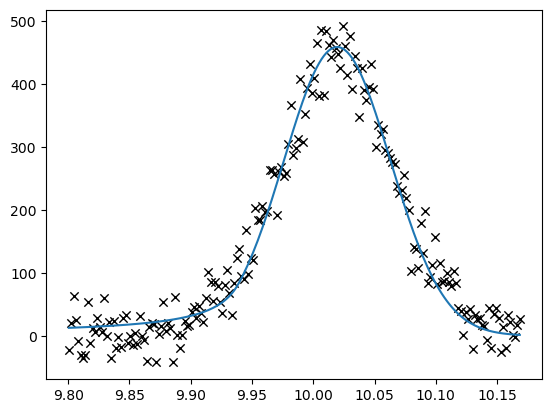

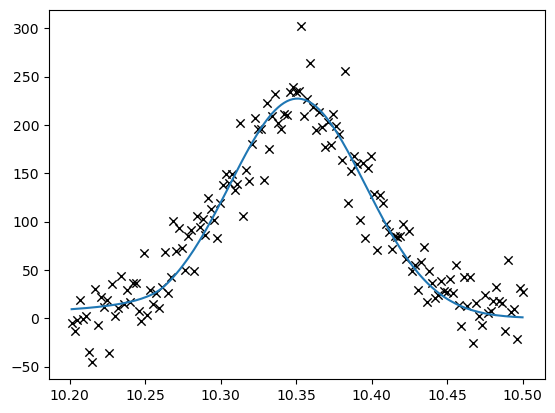

<Figure size 640x480 with 0 Axes>

In [532]:
alpha_fit_2_fi = cb_2_fi.values['alpha']
n_fit_2_fi = cb_2_fi.values['n']
mu_fit_2_fi = cb_2_fi.values['mu']
sig_fit_2_fi = cb_2_fi.values['sig']

alpha_fit_3_fi = cb_3_fi.values['alpha']
n_fit_3_fi = cb_3_fi.values['n']
mu_fit_3_fi = cb_3_fi.values['mu']
sig_fit_3_fi = cb_3_fi.values['sig']


plt.scatter(bins_2, count_2_clean, marker = 'x', color = 'k', lw = 1)
plt.plot(bins_2, crystalball(bins_2, alpha_fit_2_fi, n_fit_2_fi, mu_fit_2_fi, sig_fit_2_fi))
plt.show()
plt.clf()

plt.scatter(bins_3, count_3_clean, marker = 'x', color = 'k', lw = 1)
plt.plot(bins_3, crystalball(bins_3, alpha_fit_3_fi, n_fit_3_fi, mu_fit_3_fi, sig_fit_3_fi))
plt.show()
plt.clf()